In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import re
import os

In [2]:
file_path = 'house_data.csv'

#house_data = pd.read_csv('house_data.csv',index_col = 0)
house_data_raw = pd.read_csv(file_path,encoding='utf8')

In [3]:
house_data_raw.describe()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,id,price,Biarea,Tomtarea,lat,lon
count,23491.000000,1.043400e+04,2.336700e+04,23424.000000,2.235800e+04,20059.000000,23424.000000,23491.000000,2.349100e+04,8720.000000,12953.000000,23491.000000,23491.000000
mean,4.992976,6.996834e+03,2.666620e+06,215.974684,8.773219e+10,21803.987337,29543.712517,528805.952918,2.878921e+06,57.518234,1977.964255,57.897567,12.184908
std,4.214733,2.408150e+05,6.117083e+05,267.133386,1.310272e+13,14344.798139,10186.993586,259546.746889,5.682062e+05,54.510821,8289.502793,0.306902,0.540079
min,3.000000,0.000000e+00,9.950000e+05,25.000000,0.000000e+00,100.000000,5625.000000,313.000000,2.000000e+06,1.000000,2.000000,57.330030,10.991294
25%,3.000000,3.938000e+03,2.195000e+06,85.000000,1.957000e+03,6000.000000,22000.000000,308655.000000,2.400000e+06,24.000000,464.000000,57.695755,11.926140
50%,4.000000,4.518000e+03,2.595000e+06,115.000000,1.972000e+03,24500.000000,28218.500000,548024.000000,2.800000e+06,49.000000,878.000000,57.748952,12.012145
75%,5.000000,5.195000e+03,3.095000e+06,151.000000,1.994000e+03,32614.500000,35507.750000,757900.500000,3.350000e+06,80.000000,1448.000000,58.008514,12.295822
max,75.000000,2.460250e+07,8.240000e+06,2685.000000,1.959196e+15,405696.000000,118519.000000,939070.000000,4.000000e+06,1535.000000,338321.000000,59.220210,14.612577


In [4]:
house_data_raw.head()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Förening,Pris per kvadratmeter,Prisutveckling,address,...,id,map_url,price,sale_date,type,url,Biarea,Tomtarea,lat,lon
0,4.0,5604.0,2475000.0,103.0,2008.0,9600.0,\n Brf Höjdpunkten\n,24757.0,\n\n +75 000 kr (+3 %)\n,Björkhagegatan 6,...,938778.0,https://maps.googleapis.com/maps/api/js?librar...,2550000.0,2019-01-28,bostadsratt,/salda/bostadsratt-4rum-stadsskogen-alingsas-k...,NaN,NaN,57.922913,12.502651
1,7.0,NaN,1995000.0,175.0,1958.0,52400.0,NaN,13029.0,\n\n +285 000 kr (+14 %)\n,Ekebackevägen 1,...,938744.0,https://maps.googleapis.com/maps/api/js?librar...,2280000.0,2019-01-28,villa,/salda/villa-7rum-lilla-foss-munkedals-kommun-...,145.0,1483.0,58.472414,11.669846
2,5.0,NaN,3495000.0,103.0,1979.0,38865.0,NaN,32330.0,\n\n -165 000 kr (-5 %)\n,Agnebäcksvägen 24,...,938717.0,https://maps.googleapis.com/maps/api/js?librar...,3330000.0,2019-01-28,radhus,/salda/radhus-5rum-landvetter-harryda-kommun-a...,NaN,201.0,57.690137,12.208904
3,5.0,NaN,2275000.0,137.0,1980.0,36000.0,NaN,16606.0,\n,Tvåöringsgränd 12,...,938962.0,https://maps.googleapis.com/maps/api/js?librar...,2275000.0,2019-01-28,villa,/salda/villa-5rum-helenedal-uddevalla-kommun-t...,21.0,346.0,58.377189,11.952472
4,3.0,4492.0,2650000.0,70.0,2016.0,NaN,\n BRF Lergöken\n,40000.0,\n\n +150 000 kr (+6 %)\n,Lergöksgatan 15,...,938923.0,https://maps.googleapis.com/maps/api/js?librar...,2800000.0,2019-01-28,bostadsratt,/salda/bostadsratt-3rum-frolunda-goteborgs-kom...,NaN,NaN,57.657389,11.900349


In [5]:
regexp_parentisis = re.compile('\(.*\)')

def clean_strings(cell):
    
    if not isinstance(cell,str):
        return cell
    
    s = cell
    s = s.replace('m2','')
    s = s.replace('kr','')
    s = s.replace('rum','')
    s = s.replace('\n','')
    s = s.replace('/','')
    s = s.replace('år','')
    s = s.replace(',','.')
    s = s.replace('Såld ','')
    s = s.replace('mån','')
    
    
    s = regexp_parentisis.sub('',s)
    
    return s
    
    

In [6]:
house_data = house_data_raw.applymap(clean_strings)

In [7]:
house_data.head()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Förening,Pris per kvadratmeter,Prisutveckling,address,...,id,map_url,price,sale_date,type,url,Biarea,Tomtarea,lat,lon
0,4.0,5604.0,2475000.0,103.0,2008.0,9600.0,Brf Höjdpunkten,24757.0,+75 000,Björkhagegatan 6,...,938778.0,https:maps.googleapis.commapsapijs?libraries=g...,2550000.0,2019-01-28,bostadsratt,saldabostadsratt-4-stadsskogen-alingsas-kommun...,NaN,NaN,57.922913,12.502651
1,7.0,NaN,1995000.0,175.0,1958.0,52400.0,NaN,13029.0,+285 000,Ekebackevägen 1,...,938744.0,https:maps.googleapis.commapsapijs?libraries=g...,2280000.0,2019-01-28,villa,saldavilla-7-lilla-foss-munkedals-kommun-ekeba...,145.0,1483.0,58.472414,11.669846
2,5.0,NaN,3495000.0,103.0,1979.0,38865.0,NaN,32330.0,-165 000,Agnebäcksvägen 24,...,938717.0,https:maps.googleapis.commapsapijs?libraries=g...,3330000.0,2019-01-28,radhus,saldaradhus-5-landvetter-harryda-kommun-agneba...,NaN,201.0,57.690137,12.208904
3,5.0,NaN,2275000.0,137.0,1980.0,36000.0,NaN,16606.0,,Tvåöringsgränd 12,...,938962.0,https:maps.googleapis.commapsapijs?libraries=g...,2275000.0,2019-01-28,villa,saldavilla-5-helenedal-uddevalla-kommun-tvaori...,21.0,346.0,58.377189,11.952472
4,3.0,4492.0,2650000.0,70.0,2016.0,NaN,BRF Lergöken,40000.0,+150 000,Lergöksgatan 15,...,938923.0,https:maps.googleapis.commapsapijs?libraries=g...,2800000.0,2019-01-28,bostadsratt,saldabostadsratt-3-frolunda-goteborgs-kommun-l...,NaN,NaN,57.657389,11.900349


In [8]:
numeric_columns = ['Antal rum','Begärt pris','Biarea','Boarea','Byggår','Driftskostnad','Pris per kvadratmeter','Prisutveckling','Tomtarea','price','Avgift/månad']
house_data[numeric_columns]

,Antal rum,Begärt pris,Biarea,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,Tomtarea,price,Avgift/månad
0,4.0,2475000.0,NaN,103.0,2008.0,9600.0,24757.0,+75 000,NaN,2550000.0,5604.0
1,7.0,1995000.0,145.0,175.0,1958.0,52400.0,13029.0,+285 000,1483.0,2280000.0,NaN
2,5.0,3495000.0,NaN,103.0,1979.0,38865.0,32330.0,-165 000,201.0,3330000.0,NaN
3,5.0,2275000.0,21.0,137.0,1980.0,36000.0,16606.0,,346.0,2275000.0,NaN
4,3.0,2650000.0,NaN,70.0,2016.0,NaN,40000.0,+150 000,NaN,2800000.0,4492.0
5,5.0,2995000.0,NaN,92.0,1967.0,5400.0,32880.0,+30 000,NaN,3025000.0,5640.0
6,3.0,3650000.0,NaN,81.0,2012.0,6600.0,47840.0,+225 000,NaN,3875000.0,3605.0
7,3.0,2250000.0,NaN,66.0,1954.0,NaN,35606.0,+100 000,NaN,2350000.0,3843.0
8,5.0,3100000.0,10.0,122.0,1997.0,26577.0,29508.0,+500 000,516.0,3600000.0,NaN
9,4.0,3750000.0,NaN,935.0,1986.0,4200.0,37433.0,-250 000,NaN,3500000.0,7949.0


In [9]:
def remove_whitespace(cell):
    
    if not isinstance(cell,str):
        return cell
    
    s = cell.replace(' ','')
    s = cell.replace('+','')
    
    return s
    

def to_number(cell):
    
    if not isinstance(cell,str):
        return cell
    
    try:
        value = float(cell.replace(' ',''))
    except:
        return None
    else:
        return value
    

In [10]:
house_data[numeric_columns] = house_data[numeric_columns].applymap(remove_whitespace)

In [11]:
house_data[numeric_columns] = house_data[numeric_columns].applymap(to_number)

In [12]:
date_regexp = re.compile('(\d\d\d\d-\d\d-\d\d)')
def find_date(date_string):
    
    if not isinstance(date_string,str):
        return None
    
    else:
        result = date_regexp.search(date_string)
        if result:
            return result.group(1)
        else:
            return None


In [13]:
house_data['sale_date'] = house_data['sale_date'].apply(func = find_date)

In [14]:
musts = ['Boarea','Pris per kvadratmeter','price']

mask = house_data[musts].notnull().all(axis = 1)
house_data = house_data.loc[mask]
house_data.fillna(0,inplace = True)

In [15]:
house_data.describe()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,id,price,Biarea,Tomtarea,lat,lon
count,23424.000000,2.342400e+04,2.342400e+04,23424.000000,2.342400e+04,23424.000000,23424.000000,2.342400e+04,23424.000000,2.342400e+04,23424.000000,23424.000000,23424.000000,23424.000000
mean,4.991078,3.112643e+03,2.652870e+06,215.974684,8.373960e+10,18607.576289,29543.712517,2.033394e+05,529626.259435,2.879402e+06,21.412184,1093.342341,57.897614,12.185018
std,4.214923,1.607565e+05,6.401697e+05,267.133386,1.280110e+13,15251.683626,10186.993586,2.816627e+05,259189.519364,5.683351e+05,43.350089,6242.142833,0.307072,0.540307
min,3.000000,0.000000e+00,0.000000e+00,25.000000,0.000000e+00,0.000000,5625.000000,-5.225000e+06,313.000000,2.000000e+06,0.000000,0.000000,57.330030,10.991294
25%,3.000000,0.000000e+00,2.195000e+06,85.000000,1.954000e+03,4440.000000,22000.000000,0.000000e+00,310333.500000,2.400000e+06,0.000000,0.000000,57.695717,11.926137
50%,4.000000,0.000000e+00,2.595000e+06,115.000000,1.970000e+03,19500.000000,28218.500000,1.950000e+05,549403.000000,2.800000e+06,0.000000,198.000000,57.748841,12.012153
75%,5.000000,4.379000e+03,3.085000e+06,151.000000,1.992000e+03,31300.000000,35507.750000,3.800000e+05,758319.750000,3.350000e+06,31.000000,949.000000,58.009242,12.295891
max,75.000000,2.460250e+07,8.240000e+06,2685.000000,1.959196e+15,405696.000000,118519.000000,9.950000e+05,939070.000000,4.000000e+06,1535.000000,338321.000000,59.220210,14.612577


In [16]:
house_data['Antal rum'].unique()

array([ 4.,  7.,  5.,  3.,  6., 25.,  8., 45., 35.,  9., 12., 11., 10.,
       21., 55., 13., 42., 65., 75., 15.])

In [17]:
house_data[numeric_columns] = house_data[numeric_columns].astype(float)

In [18]:
house_data['sale_date'] = pd.to_datetime(house_data['sale_date'])

In [19]:
price_max = house_data['price'].quantile(0.9999)
price_min = house_data['price'].quantile(0.0001)

price_m2_max = house_data['Pris per kvadratmeter'].quantile(0.995)
price_m2_min = house_data['Pris per kvadratmeter'].quantile(0.001)


mask = ((house_data['price'] > price_min) & (house_data['price'] < price_max) &
       (house_data['Pris per kvadratmeter'] > price_m2_min) & (house_data['Pris per kvadratmeter'] < price_m2_max)
       )
house_data_clean = house_data.loc[mask].copy()

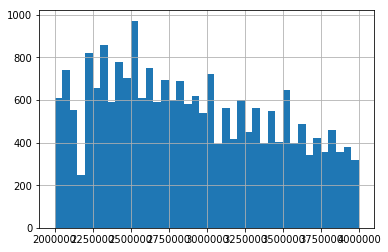

In [20]:
fig,ax = plt.subplots()
house_data_clean['price'].hist(bins = 40,ax = ax)

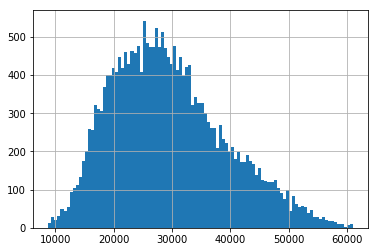

In [21]:
fig,ax = plt.subplots()
house_data_clean['Pris per kvadratmeter'].hist(bins = 100,ax = ax)

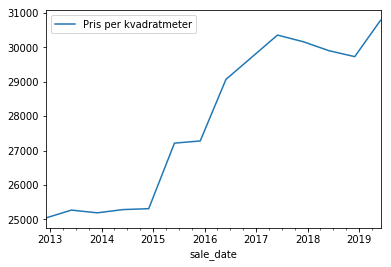

In [22]:
fig,ax = plt.subplots()
#mask = house_data['Pris per kvadratmeter'] < 70000
house_data_ = house_data_clean.set_index('sale_date')

house_data_.resample('6M').median().plot(y = 'Pris per kvadratmeter',ax = ax,alpha=1)

In [23]:
name,ext = os.path.splitext(file_path)
new_name = '%s_clean_no_coordinates%s' % (name,ext)
house_data_clean.to_csv(new_name,index = False)

In [24]:
regexp_coordinates = re.compile('\[(.*)\,(.*)\]')
def get_lat_lon(coordinate_string):

    result = regexp_coordinates.search(coordinate_string)
    if not result:
        lat = None
        lon = None
    else:
        lat = float(result.group(1))
        lon = float(result.group(2))

    s = pd.Series()
    s['lat'] = lat
    s['lon'] = lon

    return s

In [25]:
house_data_clean.describe()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,id,price,Biarea,Tomtarea,lat,lon
count,22434.000000,2.243400e+04,2.243400e+04,22434.000000,2.243400e+04,22434.000000,22434.000000,2.243400e+04,22434.000000,2.243400e+04,22434.000000,22434.00000,22434.000000,22434.000000
mean,4.977891,3.175655e+03,2.654204e+06,216.766604,8.741867e+10,18589.651467,29461.822279,2.051977e+05,528051.927209,2.881532e+06,21.224035,1065.54141,57.894742,12.183183
std,4.191378,1.642644e+05,6.213439e+05,268.321613,1.308051e+13,15257.182467,9696.504115,2.810909e+05,259348.711121,5.456841e+05,43.502880,6111.72088,0.304406,0.535244
min,3.000000,0.000000e+00,0.000000e+00,38.000000,0.000000e+00,0.000000,8803.000000,-5.225000e+06,313.000000,2.000050e+06,0.000000,0.00000,57.330030,10.991294
25%,3.000000,0.000000e+00,2.200000e+06,85.000000,1.954000e+03,4440.000000,22115.000000,0.000000e+00,307907.500000,2.415000e+06,0.000000,0.00000,57.695557,11.926365
50%,4.000000,0.000000e+00,2.595000e+06,115.000000,1.971000e+03,19437.000000,28313.000000,2.000000e+05,545008.500000,2.810000e+06,0.000000,191.00000,57.747187,12.012291
75%,5.000000,4.387000e+03,3.000000e+06,151.000000,1.992000e+03,31300.750000,35487.750000,3.800000e+05,757418.250000,3.325000e+06,30.000000,938.00000,57.991506,12.291706
max,75.000000,2.460250e+07,8.240000e+06,2685.000000,1.959196e+15,405696.000000,61000.000000,9.950000e+05,939070.000000,3.999500e+06,1535.000000,338321.00000,59.099301,14.612577


In [26]:
coordinates = house_data_clean['coordinate'].apply(func = get_lat_lon)
house_data_clean = pd.concat((house_data_clean,coordinates),axis = 1)

In [27]:
#mask = (house_data_clean['lat'].notnull() & house_data_clean['lon'].notnull())
#house_data_clean = house_data_clean.loc[mask]

ValueError: Cannot index with multidimensional key

In [28]:
name,ext = os.path.splitext(file_path)
new_name = '%s_clean%s' % (name,ext)

In [29]:
house_data_clean.to_csv(new_name,index = False)